# 1st Data Innovators Challenge 

###### First of all if you dont have all the library i used , you need to install those.. so this code is just for installing the library, uncomment those line to install

# Reading the Dataset  and check for null or duplicate values
##### if there are any null or duplicate values we will clean the dataset. 

In [11]:
import pandas as pd

data = pd.read_csv("../ecommerce_customer_behavior_dataset.csv")

data.describe()



,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


In [12]:
#check if any null value available or not
data.isnull().sum()

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

###### There is no null value

In [215]:
# checking if any duplicated value avalavle or not
print(f'Number of Duplicate value in the dataset is {data.duplicated().sum()}')

Number of Duplicate value in the dataset is 0


###### No duplicate data or Null value in this dataset so we can go further procedure


In [23]:
# data frame the dataset
df = pd.DataFrame(data)

In [33]:
df.describe()


,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


# Level 1: Basic Insights

### Q1: Find Mean, Median and Mode(Age)

In [216]:
# Q1: Find Mean, Median and Mode(Age)

#mean value of age
mean_age = df['Age'].mean()
print(f'Mean value of Age of the dataset is: {mean_age}')

#median value of age
median_age = df['Age'].median()
print(f'Median value of Age of the dataset is: {median_age}')

#mode value of age
mode_age = df['Age'].mode()[0]
print(f'Mode value of Age of the dataset is: {mode_age}')



Mean value of Age of the dataset is: 43.7899
Median value of Age of the dataset is: 44.0
Mode value of Age of the dataset is: 51


### Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [47]:
#Variance of(Purchase Amount) of the Dataset
variance_purchase_amount = df['Purchase Amount ($)'].var()
print(f"Variance of Purchase Amount: {variance_purchase_amount:.3f}")

# Standard Daviation
std_dev_purchase_amount = df['Purchase Amount ($)'].std()
print(f"Standard Deviation of Purchase Amount: {std_dev_purchase_amount:.3f}")

# Z score 
mu = df['Purchase Amount ($)'].mean()
z_score_purchase_amount = (df['Purchase Amount ($)']-mu)/std_dev_purchase_amount
print(f"Z Score of Purchase Ammount of the dataset is:\n{z_score_purchase_amount}")


Variance of Purchase Amount: 81932.241
Standard Deviation of Purchase Amount: 286.238
Z Score of Purchase Ammount of the dataset is:
0      -1.052804
1       0.531192
2       1.606207
3      -0.063942
4      -1.259869
          ...   
9995   -1.413727
9996    1.026829
9997    1.104946
9998   -1.638330
9999   -0.944817
Name: Purchase Amount ($), Length: 10000, dtype: float64


In [48]:
# checking how spread the Z score is
min_z = z_score_purchase_amount.min()
max_z = z_score_purchase_amount.max()

print(f"Minimum Z score: {min_z}")
print(f"Maximum Z score: {max_z}")

Minimum Z score: -1.7422646456977826
Maximum Z score: 1.7331289361392022


## Q3: What are the top three product categories based on the number of purchases?

##### At first Group by catagory and counting the  total number of sale in same catagory


In [109]:
category_group = df.groupby('Product Category').agg(
    total_items_purchased=('Number of Items Purchased', 'sum')
).reset_index()

#sort the categories by 'total_items_purchased' in descending order
sorted_categories = category_group.sort_values(by='total_items_purchased', ascending=False)

sorted_categories


,Product Category,total_items_purchased
7,Toys,6580
1,Books,6533
3,Electronics,6469
2,Clothing,6359
5,Home,6214
4,Groceries,6067
0,Beauty,6057
6,Sports,5706


In [111]:
#top 3 products based on number or purchase

top_3_categories = sorted_categories.head(3).reset_index()

print(top_3_categories)


   index Product Category  total_items_purchased
0      7             Toys                   6580
1      1            Books                   6533
2      3      Electronics                   6469


### Q4: How many customers are classified as return customers?

In [127]:
return_customer = df[df['Return Customer']==1].shape[0]
print(f'Number of returne customer is {return_customer}')
      

Number of returne customer is 4996


### Q5: What is the average review score given by customers?

In [130]:
avg_review_score = df['Review Score (1-5)'].mean()

print(f"Avarage review score is: {avg_review_score:.1f}")

Avarage review score is: 3.0


### Q6: How does the average delivery time vary between subscription statuses (Free,Premium)?

In [148]:
# Avarage Delivery time for Free users
free_subscriber = df[df['Subscription Status']=='Free']
avg_free_delivery_time = free_subscriber['Delivery Time (days)'].mean()
avg_free_delivery_time



6.963923673225999

In [150]:
premium_subscriber = df[df['Subscription Status']=='Premium']
premium_subscriber_delivery_time = premium_subscriber['Delivery Time (days)'].mean()
premium_subscriber_delivery_time

7.070347284060552

### Q7: How many customers are subscribed to the service?

In [168]:
# number of subscribed user to the service
subscriber = df[df['Subscription Status']=='Premium'].shape[0]
print(f'The total number of Customer subscribed to the service is {subscriber}')

The total number of Customer subscribed to the service is 3369


### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,Tablet)

In [174]:

mobile_user = df[df['Device Type']=='Mobile'].shape[0]
desktop_user = df[df['Device Type']=='Desktop'].shape[0]
tablet_user = df[df['Device Type']=='Tablet'].shape[0]

# total user is 10000
total_user = mobile_user+desktop_user+tablet_user
total_user

10000

In [177]:
# percentage of customer used Mobile to make purchase
mobile_user_percentage = mobile_user*100/total_user
print("Percentage of customer used Mobile to make purchase: ", mobile_user_percentage, "%")

# percentage of customer uses Desktop to make purchase
desktop_user_percentage = desktop_user*100/total_user
print("Percentage of customer used Desktop to make purchase: ", desktop_user_percentage, "%")

# percentage of customer usser Tablet to make purchase
tablet_user_percentage = tablet_user*100/total_user
print('Percentage of customer used Tablet to make purchase: ', tablet_user_percentage)


Percentage of customer used Mobile to make purchase:  33.74 %
Percentage of customer used Desktop to make purchase:  33.48 %
Percentage of customer used Tablet to make purchase:  32.78


### Q9: What is the average purchase amount for customers who availed discounts compared to those who didn’t?


In [178]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [186]:
df_discount = df[df['Discount Availed']==1]
df_no_discount = df[df['Discount Availed']==0]

avg_purchase_discount = df_discount['Purchase Amount ($)'].mean()
print(f'Avarage Purchase amount for customer who used Discount is {avg_purchase_discount:.2f}$')

avg_purchase_not_discount = df_no_discount['Purchase Amount ($)'].mean()
print(f'Avarage Purchase amount for customer who did not use Discount is {avg_purchase_not_discount:.2f}$')

Avarage Purchase amount for customer who used Discount is 505.26$
Avarage Purchase amount for customer who did not use Discount is 502.51$


### Q10: What is the most common payment method used by customers?

In [187]:
df.head(10)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High
5,6,63,Female,Rajshahi,Books,755.39,54,Tablet,Cash on Delivery,False,6,True,3,4,Trial,High
6,7,28,Female,Khulna,Groceries,866.41,41,Desktop,Debit Card,True,3,True,2,2,Free,High
7,8,38,Male,Dhaka,Electronics,103.12,46,Desktop,Debit Card,False,1,False,3,13,Premium,Low
8,9,54,Other,Sylhet,Books,924.58,47,Mobile,PayPal,False,9,True,2,11,Trial,Medium
9,10,33,Male,Khulna,Groceries,184.64,18,Mobile,Debit Card,True,9,False,4,1,Trial,Low


In [273]:
# Group by 'Payment Method' and count 
df_payment = df.groupby('Payment Method').agg(
    total_payment_method=('Payment Method', 'count')
)

# Sort by total count and reset index
df_payment = df_payment.sort_values(by='total_payment_method', ascending=False).reset_index()

# Access the most common payment method (top row after sorting)
common_payment_method = df_payment.at[0, 'Payment Method']

print(f'Most common payment method is {common_payment_method}')


Most common payment method is Bank Transfer


# Level 2: Intermediate Insights (21 Marks)

### Q1: What are the average review scores of users of the most common payment method?

As we Discoverd that The most common method is Bank Transfer.
So we just need to calculate average review scores of Those who used Bank Transfer.

In [224]:
df_review_of_most_common_method = df[df['Payment Method']==common_payment_method]
avg_scr_common_method = df_review_of_most_common_method['Review Score (1-5)'].mean()

print(f"Avarage score of Most common method is {avg_scr_common_method:.1f}")

Avarage score of Most common method is 3.0


### Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?

In [232]:
df_corr_tm_pa= df[['Time Spent on Website (min)', 'Purchase Amount ($)']]

corr_matrix1 =df_corr_tm_pa.corr()
corr_matrix1

,Time Spent on Website (min),Purchase Amount ($)
Time Spent on Website (min),1.000000,0.010025
Purchase Amount ($),0.010025,1.000000


In [234]:
df_corr_tm_ni = df[['Time Spent on Website (min)','Number of Items Purchased']]
corr_matrix2 = df_corr_tm_ni.corr()
corr_matrix2

,Time Spent on Website (min),Number of Items Purchased
Time Spent on Website (min),1.000000,0.000148
Number of Items Purchased,0.000148,1.000000


a correlation value between -1 and 1:
    1 means perfect positive correlation.
    -1 means perfect negative correlation.
    0 means no correlation.

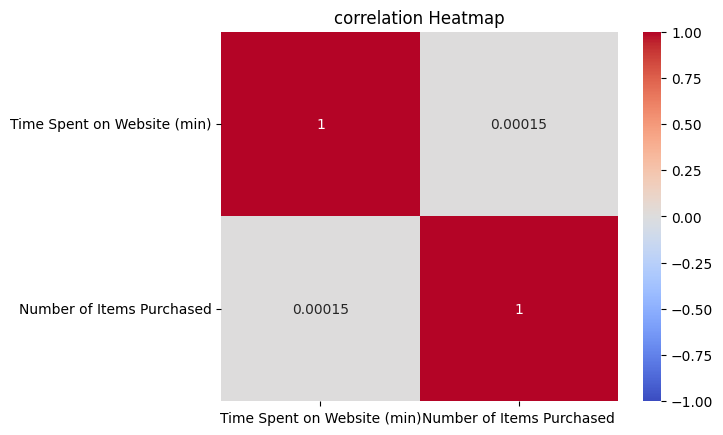

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix2,annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.title('correlation Heatmap')
plt.show()

### Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?

In [243]:
df.head(1)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low


In [249]:
total_satisfied_customer = df[df['Review Score (1-5)']>=4].shape[0]

satisfied_returned_customer = df[(df['Review Score (1-5)']>=4) & (df['Return Customer']==1)].shape[0]

percentage_sat_ret_cus = satisfied_returned_customer*100/total_satisfied_customer

print(f'Percentage of Satisfied and Retuen customer is {percentage_sat_ret_cus:.2f}')

Percentage of Satisfied and Retuen customer is 50.15


### Q4: What is the relationship between the number of items purchased and customer satisfaction?

In [262]:
df_q4 = df[['Number of Items Purchased','Review Score (1-5)']]
df_q4 = df_q4[df['Review Score (1-5)']>=4]

df_q4_corr = df_q4.corr()
df_q4_corr


,Number of Items Purchased,Review Score (1-5)
Number of Items Purchased,1.000000,-0.003408
Review Score (1-5),-0.003408,1.000000


### Q5: Which location has the 2nd highest average purchase amount?

In [263]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [280]:
df_loc_avg = df.groupby('Location').agg(
    Average = ('Purchase Amount ($)', 'mean')
)
df_loc_avg = df_loc_avg.sort_values(by='Average', ascending=False).reset_index()

second_highest_purchase_loc = df_loc_avg.at[1,'Location']
print(f'{second_highest_purchase_loc} has the 2nd highest average purchase amount')

Barisal has the 2nd highest average purchase amount


# Level 3: Critical Thinking Insights 

### Q1: What factors contribute most to a customer being classified as a return customer?

In [289]:
df.head(0)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction


In [295]:
return_factors = data[data['Return Customer'] == 1]
return_factors

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High
5,6,63,Female,Rajshahi,Books,755.39,54,Tablet,Cash on Delivery,False,6,True,3,4,Trial,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,69,Other,Rangpur,Sports,940.90,56,Desktop,Cash on Delivery,True,2,True,4,11,Trial,High
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium


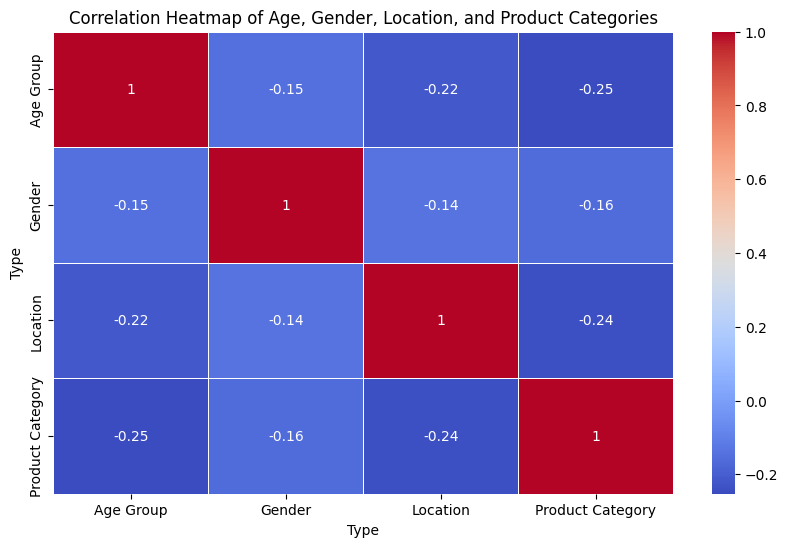

In [306]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a more versatile DataFrame with random categories and counts
data = {
    'Age Group': ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65'],
    'Age Count': [10, 25, 40, 20, 15, 8, 5],
    
    'Gender': ['Male', 'Female', 'Non-binary', 'Other'],
    'Gender Count': [45, 50, 5, 3],
    
    'Location': ['Dhaka', 'Khulna', 'Barishal', 'Chittagong', 'Sylhet', 'Rajshahi', 'Mymensingh', 'Comilla'],
    'Location Count': [55, 12, 8, 20, 18, 9, 7, 10],
    
    'Product Category': ['Electronics', 'Clothing', 'Furniture', 'Books', 'Toys', 'Groceries', 'Accessories', 'Beauty Products'],
    'Product Count': [40, 30, 20, 10, 5, 25, 15, 8]
}

# Creating DataFrames for each category
df_age = pd.DataFrame({'Category': data['Age Group'], 'Count': data['Age Count'], 'Type': 'Age Group'})
df_gender = pd.DataFrame({'Category': data['Gender'], 'Count': data['Gender Count'], 'Type': 'Gender'})
df_location = pd.DataFrame({'Category': data['Location'], 'Count': data['Location Count'], 'Type': 'Location'})
df_product = pd.DataFrame({'Category': data['Product Category'], 'Count': data['Product Count'], 'Type': 'Product Category'})

# Combine all DataFrames into one
df_combined = pd.concat([df_age, df_gender, df_location, df_product])

# Pivot the DataFrame for correlation
df_pivot = df_combined.pivot(index='Category', columns='Type', values='Count').fillna(0)

# Calculating the correlation matrix
correlation_matrix = df_pivot.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Age, Gender, Location, and Product Categories')
plt.show()


In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a more versatile DataFrame with random categories and counts
data = {
    'Age Group': ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65'],
    'Age Count': [10, 25, 40, 20, 15, 8, 5],
    
    'Gender': ['Male', 'Female', 'Non-binary', 'Other'],
    'Gender Count': [45, 50, 5, 3],
    
    'Location': ['Dhaka', 'Khulna', 'Barishal', 'Chittagong', 'Sylhet', 'Rajshahi', 'Mymensingh', 'Comilla'],
    'Location Count': [55, 12, 8, 20, 18, 9, 7, 10],
    
    'Product Category': ['Electronics', 'Clothing', 'Furniture', 'Books', 'Toys', 'Groceries', 'Accessories', 'Beauty Products'],
    'Product Count': [40, 30, 20, 10, 5, 25, 15, 8]
}

# Creating DataFrames for each category
df_age = pd.DataFrame({'Category': data['Age Group'], 'Count': data['Age Count'], 'Type': 'Age Group'})
df_gender = pd.DataFrame({'Category': data['Gender'], 'Count': data['Gender Count'], 'Type': 'Gender'})
df_location = pd.DataFrame({'Category': data['Location'], 'Count': data['Location Count'], 'Type': 'Location'})
df_product = pd.DataFrame({'Category': data['Product Category'], 'Count': data['Product Count'], 'Type': 'Product Category'})

# Combine all DataFrames into one
df_combined = pd.concat([df_age, df_gender, df_location, df_product])

# Pivot the DataFrame for correlation
df_pivot = df_combined.pivot(index='Category', columns='Type', values='Count').fillna(0)

# Calculating the correlation matrix
correlation_matrix = df_pivot.corr()

# Finding the maximum correlation value excluding self-correlation
max_corr_value = correlation_matrix.unstack().sort_values(ascending=False)
max_corr_value = max_corr_value[max_corr_value < 1]  # Exclude self-correlation (1.0)
max_corr_pair = max_corr_value.idxmax()  # Get the pair of categories with the max correlation
max_corr_value = max_corr_value.max()  # Get the maximum correlation value

# Output the results
print(f'Maximum Correlation: {max_corr_value}')
print(f'Between Categories: {max_corr_pair}')


Maximum Correlation: -0.13943505556925467
Between Categories: ('Gender', 'Location')


In [308]:
df.head(2)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
